<a href="https://colab.research.google.com/github/xor1011/Desktop/blob/master/Analysis_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href=https://psychology.wikia.org/wiki/Conjunction_fallacy>Conjunction Fallacy</a>
<br><a href=http://gss.norc.org/get-the-data/spss>GSS DATA</a>
<br><a href=sftp://2466327@f17-preview.awardspace.net:221/ndttools.dx.am/GSS2018.sav>2018 GSS Data Set</a><br>
<a href=https://gss.norc.org/documents/codebook/gss_codebook.pdf>The GSS Codes PDF</a>
<br>Bayes Theorem<br>
$P(A|B)=\frac{P(A and B)}{P(B)}$


In [ ]:
!pip install pyreadstat
import pandas as pd
import pyreadstat 
gss= pd.read_spss("GSS2018.sav")
gss.index_col=0
gss.head()

,ABANY,ABDEFECT,ABFELEGL,ABHELP1,ABHELP2,ABHELP3,ABHELP4,ABHLTH,ABINSPAY,ABMEDGOV1,ABMEDGOV2,ABMELEGL,ABMORAL,ABNOMORE,ABPOOR,ABPOORW,ABRAPE,ABSINGLE,ABSTATE1,ABSTATE2,ACQNTSEX,ACTSSOC,ADMINCONSENT,ADULTS,ADVFRONT,AFFRMACT,AFRAIDOF,AFTERLIF,AGE,AGED,AGEKDBRN,ANCESTRS,ARTHRTIS,ASTROLGY,ASTROSCI,ATHEISTS,ATTEND,ATTEND12,ATTENDMA,ATTENDPA,...,WORDC,WORDD,WORDE,WORDF,WORDG,WORDH,WORDI,WORDJ,WORDSUM,WORKBLKS,WORKDIFF,WORKFAST,WORKFOR1,WORKHARD,WORKHSPS,WORKWHTS,WRKGOVT,WRKHOME,WRKSCHED,WRKSLF,WRKSLFFAM,WRKSTAT,WRKTIME,WRKTYPE,WRKWAYUP,WTSS,WTSSALL,WTSSNR,WWWHR,WWWMIN,XMARSEX,XMARSEX1,XMOVIE,XNORCSIZ,YEAR,YEARSJOB,YEARSUSA,YEARVAL,YOUSUP,ZODIAC
0,NO,YES,NaN,Yes,Yes,Yes,Yes,YES,People should be able,The government should decide,NaN,It depends,Morally opposed,NO,NO,ALWAYS WRONG,YES,NO,Neither easy nor hard,Make it harder,NaN,Very good,R does not consent to possible data linkage,5.0,Strongly agree,STRONGLY OPPOSE PREF,Never,"YES, DEFINITELY",43,NaN,NaN,"No, definitely not",No,No,Not at all scientific,Somewhat negative,2-3X A MONTH,EVERY WEEK,EVERY WEEK,ABOUT ONCE OR TWICE A YR,...,CORRECT,CORRECT,CORRECT,CORRECT,INCORRECT,CORRECT,CORRECT,CORRECT,9.0,6,Strongly Agree,Strongly Agree,For-profit company,NaN,2,4,PRIVATE,A few times a year,Day shift,SOMEONE ELSE,NaN,TEMP NOT WORKING,Not at all true,"REGULAR, PERMANENT EMPLOYEE",AGREE STRONGLY,2.357493,2.357493,2.753531,20.0,0.0,ALWAYS WRONG,ALWAYS WRONG,NaN,"UNINC,MED CITY",2018.0,1,NaN,NaN,45.0,VIRGO
1,YES,YES,It depends,No,No,No,No,YES,People should not be able,NaN,A woman and her medical professional should de...,NaN,It depends,YES,NO,NaN,YES,YES,Easy,Stay the same as now,NaN,Good,R does not consent to possible data linkage,2.0,NaN,NaN,Never,NaN,74,A GOOD IDEA,21.0,NaN,NaN,NaN,NaN,NaN,ONCE A YEAR,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3RD IMPORTANT,NaN,NaN,PRIVATE,NaN,NaN,SOMEONE ELSE,NaN,RETIRED,NaN,NaN,NaN,0.942997,0.942997,1.101412,NaN,NaN,ALWAYS WRONG,NaN,NO,"UNINC,MED CITY",2018.0,NaN,NaN,NaN,NaN,AQUARIUS
2,NaN,NaN,NaN,Yes,No,Yes,Yes,NaN,People should not be able,A woman and her medical professional should de...,NaN,It depends,It depends,NaN,NaN,WRONG ONLY SOMETIMES,NaN,NaN,Very easy,Make it harder,NaN,Excellent,R does not consent to possible data linkage,2.0,Disagree,STRONGLY OPPOSE PREF,NaN,"YES, DEFINITELY",42,A GOOD IDEA,35.0,"No, probably not",No,No,Not at all scientific,Neither positive nor negative,ONCE A YEAR,SEVERAL TIMES A WEEK,SEVERAL TIMES A WEEK,EVERY WEEK,...,INCORRECT,CORRECT,CORRECT,CORRECT,INCORRECT,INCORRECT,CORRECT,INCORRECT,6.0,4,Agree,Disagree,For-profit company,2ND IMPORTANT,4,4,PRIVATE,A few times a year,Night shift,SOMEONE ELSE,NaN,WORKING FULLTIME,Not too true,"REGULAR, PERMANENT EMPLOYEE",NEITHER AGREE NOR DISAGREE,0.942997,0.942997,1.101412,10.0,0.0,NaN,ALWAYS WRONG,NO,"UNINC,MED CITY",2018.0,15,NaN,NaN,3.0,ARIES
3,NaN,NaN,Should,Yes,Yes,Yes,Yes,NaN,People should be able,NaN,A woman and her medical professional should de...,NaN,It depends,NaN,NaN,NaN,NaN,NaN,Easy,Stay the same as now,NaN,Very good,R consents to possible data linkage,2.0,NaN,OPPOSE PREF,NaN,NaN,63,A GOOD IDEA,32.0,NaN,Yes,NaN,NaN,NaN,NRLY EVERY WEEK,NaN,NaN,NaN,...,INCORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,9.0,4,Strongly Agree,Strongly Agree,Non-profit or not-for-profit organization,MOST IMPORTANT,4,4,PRIVATE,Never,Day shift,SOMEONE ELSE,NaN,WORKING FULLTIME,Very true,"REGULAR, PERMANENT EMPLOYEE",NEITHER AGREE NOR DISAGREE,0.942997,0.942997,1.101412,6.0,0.0,NaN,NaN,NO,"UNINC,MED CITY",2018.0,25,NaN,NaN,10.0,ARIES
4,NO,YES,NaN,No,No,No,Yes,YES,People should not be able,NaN,A woman and her medical professional should de...,It depends,Morally opposed,NO,NO,NaN,NO,NO,NaN,Stay the same as now,NaN,Excellent,R consents to possible data linkage,2.0,NaN,NaN,A few times a month,NaN,71,A BAD IDEA,NaN,NaN,NaN,NaN,NaN,NaN,MORE THN ONCE WK,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOST IMPORTANT,NaN,NaN,PRIVATE,NaN,NaN,SOMEONE

In [ ]:
gss.tail()#Prints the last five rows. Just because

In [ ]:
industries=gss['INDUS10'] #create a variable called industries and assign it to the industry column of our data frame
x=0
#see all industries
for i in industries: 
  print({x}, i)
  x=x+1
type(industries)#a pandas series is a 1 dimensional array 

{0} Employment services
{1} Grocery stores
{2} Wired telecommunications carriers
{3} Hospitals
{4} Electronic component and product manufacturing, n.e.c.
{5} Navigational, measuring, electromedical, and control instruments manufacturing
{6} Employment services
{7} Grocery stores
{8} Child day care services
{9} Construction
{10} Nursing care facilities
{11} Bus service and urban transit
{12} Postal Service
{13} Soap, cleaning compound, and cosmetics manufacturing
{14} Not specified retail trade
{15} Management, scientific, and technical consulting services
{16} Insurance carriers and related activities
{17} nan
{18} Elementary and secondary schools
{19} Pharmacies and drug stores
{20} Postal Service
{21} nan
{22} Employment services
{23} Construction
{24} Outpatient care centers
{25} Automotive repair and maintenance
{26} Offices of optometrists
{27} nan
{28} Individual and family services
{29}  Restaurants and other food services
{30} Offices of physicians
{31} Truck transportation
{32

pandas.core.series.Series

In [ ]:
banker=(gss['INDUS10']=='Banking and related activities') 
banker.sum()

35

In [ ]:
banker.mean()

0.014906303236797274

####Do some useful conditional proababilities

In [ ]:
def prob(A):
  return A.mean()

def conditionalProb(proposition, given):
  return prob(proposition[given])

In [ ]:
prob(banker) #same as banker.mean()

0.014906303236797274

In [ ]:
female=(gss['SEX']=='FEMALE')
#Create female series from dataframe Respondents said female=true
print(prob(female))
print(prob(female & banker))

0.5519591141396933
0.011073253833049404


In [ ]:
EL=(gss['POLVIEWS']=='EXTREMELY LIBERAL')
SL=(gss['POLVIEWS']=='SLIGHTLY LIBERAL')
L=(gss['POLVIEWS']=='LIBERAL')
liberal=EL|L|SL
liberal
prob(liberal)

0.27938671209540034

In [ ]:
gss['PARTYID']
sd=(gss['PARTYID']=='STRONG DEMOCRAT')
nsd=(gss['PARTYID']=='NOT STR DEMOCRAT')
democrat=sd|nsd
prob(democrat)

0.3113287904599659

In [ ]:
prob(banker & democrat)

0.0038330494037478705

In [ ]:
demolib=conditionalProb(democrat, liberal) #democrat given liberal
print(prob(demolib))
print (conditionalProb(liberal, democrat)) #liberal given democrat
fembank=conditionalProb(female, banker) #female given banker
print(prob(fembank))
bankfem=conditionalProb(banker, female) #female given banker
print(bankfem)

0.5807926829268293
0.521203830369357
0.7428571428571429
0.020061728395061727


In [ ]:
conditionalProb(female, liberal & democrat)



0.5380577427821522

In [ ]:
conditionalProb((gss['PARTYID']=='STRONG REPUBLICAN'), female) #for the lolz
republican=(gss['PARTYID']=='STRONG REPUBLICAN')|(gss['PARTYID']=='NOT STR REPUBLICAN')
male=(gss['SEX']=='MALE')
male.sum()

1052

Linda is 31 years old, single, outspoken, and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in anti-nuclear demonstrations.
<br>
Which is more likely?<br><font color='red'>
<b>A:</b> Linda is a bank teller.<br>
<b>B:</b> Linda is a bank teller and is active in the feminist movement.

In [ ]:
womenBankers=conditionalProb(female, given=banker)*100
print('~%.1f%% of bankers are women' % womenBankers)
liberalWomenBankers=conditionalProb(liberal & female, given=banker)*100
print ('~%.1f%% of bankers are liberal women' % liberalWomenBankers)

prob(female & banker)/prob(banker)

~74.3% of bankers are women
~14.3% of bankers are liberal women


0.7428571428571429

In [ ]:
#if we were making a classifer
if womenBankers<liberalWomenBankers:
  print ('A is the correct answer')
else:
  print ('B is the correct answer')

A is the correct answer


In [ ]:
#with Bayes theorem we do the same thing as our conditional probability function
print(conditionalProb(liberal, given=banker))
print(prob(liberal)*conditionalProb(banker, liberal)/prob(banker))
print((banker.mean()* liberal[banker].mean())/banker.mean())

0.2
0.2
0.2


###### Code FEJOBAFF for or against preferrential hiring of women
###### ['AGAINST', 'FOR', 'STRONGLY AGAINST', 'STRONGLY FOR']

In [ ]:
prefHiringWomen=(gss['FEJOBAFF']=='FOR')|(gss['FEJOBAFF']=='STRONGLY FOR')
prefHiringWomen.sum()

286

In [ ]:
prob(prefHiringWomen)

0.12180579216354344

In [ ]:
def str_percent(pr):
  pr=pr*100
  return str('%.2f'% pr)


In [ ]:
female_prefHiring=conditionalProb(prefHiringWomen, female)*100
liberal_prefHiring=conditionalProb(prefHiringWomen, liberal)*100
print (str('%.2f'% female_prefHiring)+'% women are for the preferential hiring of women\n'+str('%.2f'% liberal_prefHiring)+'% liberals are for the preferential hiring of women' )

femaleRepublican_prefHiring=conditionalProb(prefHiringWomen, republican & female)*100
print (str('%.2f'%femaleRepublican_prefHiring)+ '% of republican women are for the preferential hiring of women' )
maleRepublican_prefHiring=conditionalProb(prefHiringWomen, male & republican)*100
print (str('%.2f'% maleRepublican_prefHiring)+'% of republican men are for the preferential hiring of women')
maleDemocrat_prefHiring=conditionalProb(prefHiringWomen, male & democrat)
print (str_percent(maleDemocrat_prefHiring)+'% of Democrat men are for the preferential hiring of women')
male_prefHiring=conditionalProb(prefHiringWomen, male)
print(str_percent(male_prefHiring)+'% of men are for the preferential hiring of women')


14.35% women are for the preferential hiring of women
14.33% liberals are for the preferential hiring of women
10.55% of republican women are for the preferential hiring of women
4.37% of republican men are for the preferential hiring of women
11.99% of Democrat men are for the preferential hiring of women
9.51% of men are for the preferential hiring of women


#####CODE COLRAC Allow Racists to teach
#####CODE COLSOC Allow Atheist to teach

In [ ]:
gss['COLRAC']
gss['COLATH']
gss['GOD']

0          KNOW GOD EXISTS
1          KNOW GOD EXISTS
2       BELIEVE BUT DOUBTS
3          KNOW GOD EXISTS
4          KNOW GOD EXISTS
               ...        
2343     SOME HIGHER POWER
2344       KNOW GOD EXISTS
2345     BELIEVE SOMETIMES
2346       KNOW GOD EXISTS
2347       KNOW GOD EXISTS
Name: GOD, Length: 2348, dtype: category
Categories (6, object): ['BELIEVE BUT DOUBTS', 'BELIEVE SOMETIMES', 'DONT BELIEVE', 'KNOW GOD EXISTS',
                         'NO WAY TO FIND OUT', 'SOME HIGHER POWER']

In [ ]:
Not_Allow_RacistTeacher=(gss['COLRAC']=='ALLOWED')
Not_Allow_RacistTeacher.sum()
Allow_AtheistTeacher=(gss['COLATH']=='ALLOWED')
Not_Allow_AtheistTeacher=(gss['COLATH']=='NOT ALLOWED')
Allow_AtheistTeacher.sum()
Not_Allow_RacistTeacher.mean()
ALLOW_Racist=(gss['COLRAC']=='NOT ALLOWED')
noan=ALLOW_Racist.mean()-Not_Allow_RacistTeacher.mean()
noan
noana=Allow_AtheistTeacher.mean()-Not_Allow_RacistTeacher.mean()
noana
Atheist=(gss['GOD']=='DONT BELIEVE')|(gss['GOD']=='NO WAY TO FIND OUT')

In [ ]:
male_republican_racist=conditionalProb(Not_Allow_RacistTeacher, male & republican)
male_democrat_racist=conditionalProb(Not_Allow_RacistTeacher, male & democrat)
print (str_percent(male_republican_racist)+'% of male republicans would allow a racist teacher')
print (str_percent(male_democrat_racist)+'% of male democrats would allow a racist teacher')
female_republican_racist=conditionalProb(Not_Allow_RacistTeacher, female * republican)
female_democrat_racist=conditionalProb(Not_Allow_RacistTeacher, female & democrat)
print (str_percent(female_republican_racist)+'% of women republicans would allow a racist teacher')
print (str_percent(female_democrat_racist)+'% of women democrats would allow a racist teacher')
republican_racist=conditionalProb(Not_Allow_RacistTeacher, republican)
print(str_percent(republican_racist)+'% of Republicans would allow a racist to teach their children')
democrat_racist=conditionalProb(Not_Allow_RacistTeacher, democrat)
print (str_percent(democrat_racist)+'% of Democrats would allow a racist to theach their children')
prob(1-Not_Allow_RacistTeacher)

32.54% of male republicans would allow a racist teacher
27.40% of male democrats would allow a racist teacher
30.18% of women republicans would allow a racist teacher
23.92% of women democrats would allow a racist teacher
31.31% of Republicans would allow a racist to teach their children
25.31% of Democrats would allow a racist to theach their children


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


0.7227427597955707

In [ ]:
republican_allow_atheist=conditionalProb(Allow_AtheistTeacher, republican)
print (str_percent(republican_allow_atheist)+'% of Republicans would allow an Atheist teacher')
democrat_allow_atheist=conditionalProb(Allow_AtheistTeacher, democrat)
print (str_percent(democrat_allow_atheist)+'% of Democrats would allow an Atheist teacher')
Female_allow_atheist=conditionalProb(Allow_AtheistTeacher, female)
print (str_percent(Female_allow_atheist)+'% of women would allow an Atheist teacher')
male_allow_atheist=conditionalProb(Allow_AtheistTeacher, male)
print (str_percent(male_allow_atheist)+'% of men would allow an Atheist teacher')
prob(1-Allow_AtheistTeacher)
Atheist_allowatheistTeacher=conditionalProb(Allow_AtheistTeacher, Atheist)
Atheist_allowRacistTeacher=conditionalProb(Not_Allow_AtheistTeacher, Atheist)

40.99% of Republicans would allow an Atheist teacher
44.73% of Democrats would allow an Atheist teacher
42.52% of women would allow an Atheist teacher
44.68% of men would allow an Atheist teacher


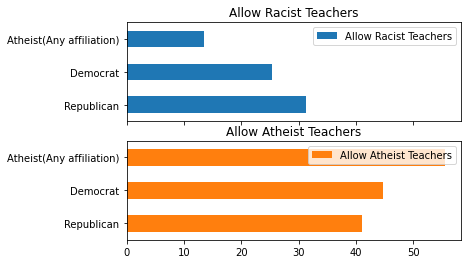

In [317]:
racTeach=[republican_racist*100, democrat_racist*100, Atheist_allowRacistTeacher*100]
athTeach=[republican_allow_atheist*100, democrat_allow_atheist*100, Atheist_allowatheistTeacher*100]
index=['Republican', 'Democrat', 'Atheist(Any affiliation)']
df=pd.DataFrame({'Allow Racist Teachers':racTeach ,
                 'Allow Atheist Teachers':athTeach}, index=index)
ax=df.plot.barh( rot=0, subplots=True)

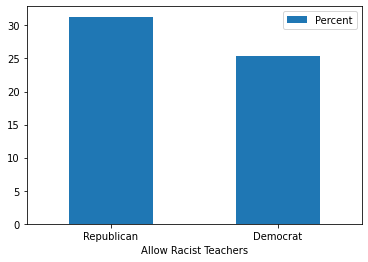

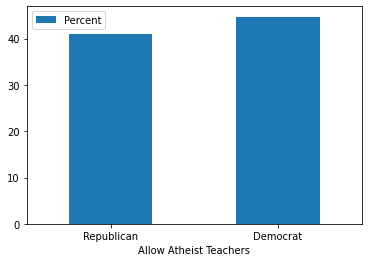

In [ ]:
df=pd.DataFrame({'Allow Racist Teachers': ['Republican', 'Democrat'], 'Percent':[republican_racist*100, democrat_racist*100]})
ax=df.plot.bar(x='Allow Racist Teachers', y='Percent', rot=0)
df=pd.DataFrame({'Allow Atheist Teachers': ['Republican', 'Democrat'], 'Percent':[republican_allow_atheist*100, democrat_allow_atheist*100]})
ax=df.plot.bar(x='Allow Atheist Teachers', y='Percent', rot=0)